<a href="https://colab.research.google.com/github/Trrunghau/Trrunghau/blob/homework/Fuzzy_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dc648684b583446024a814504e091ea88ad0b6884dd32520c78debab13781cf5
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


1.5765957446808503


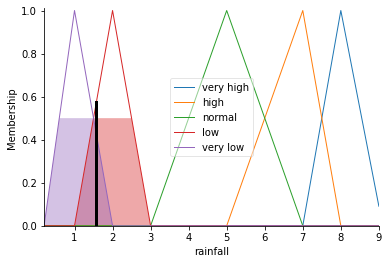

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crtl 

wind = crtl.Antecedent(np.arange(0,3.1,0.1),'wind')        # input
rainfall = crtl.Consequent(np.arange(0.2,9.1,0.1),'rainfall')  # input
temper = crtl.Antecedent(np.arange(20.4,41.2,0.2),'temper')         # output

wind['very high'] = fuzz.trimf(wind.universe,[1.55,1.8,3.1])
wind['high'] = fuzz.trimf(wind.universe,[1.32,1.55,1.8])
wind['normal'] = fuzz.trimf(wind.universe,[1.1,1.3,1.5])
wind['low'] = fuzz.trimf(wind.universe,[0.7,1.1,1.3])
wind['very low'] = fuzz.trimf(wind.universe,[0,0.7,1.05])
temper['very high'] = fuzz.trimf(temper.universe,[35,41.2,41.2])
temper['high'] = fuzz.trimf(temper.universe,[29,35,41.2])
temper['normal'] = fuzz.trimf(temper.universe,[26,29,35])
temper['low'] = fuzz.trimf(temper.universe,[23,26,29])
temper['very low'] = fuzz.trimf(temper.universe,[20.4,23,25])

rainfall['very high'] = fuzz.trimf(rainfall.universe,[7,8,9.1])
rainfall['high'] = fuzz.trimf(rainfall.universe,[5,7,8])
rainfall['normal'] = fuzz.trimf(rainfall.universe,[3,5,7])
rainfall['low'] = fuzz.trimf(rainfall.universe,[1,2,3])
rainfall['very low'] = fuzz.trimf(rainfall.universe,[0.2,1,2])



rule1 = crtl.Rule(temper['very low']&wind['very low'],rainfall['very low'])
rule2 = crtl.Rule(temper['very low']&wind['low'],rainfall['very low'])
rule3 = crtl.Rule(temper['very low']&wind['normal'],rainfall['low'])
rule4 = crtl.Rule(temper['very low']&wind['high'],rainfall['low'])
rule5 = crtl.Rule(temper['very low']&wind['very high'],rainfall['normal'])
rule6 = crtl.Rule(temper['low']&wind['very low'],rainfall['very low'])
rule7 = crtl.Rule(temper['low']&wind['low'],rainfall['low'])
rule8 = crtl.Rule(temper['low']&wind['normal'],rainfall['low'])
rule9 = crtl.Rule(temper['low']&wind['high'],rainfall['normal'])
rule10 = crtl.Rule(temper['low']&wind['very high'],rainfall['normal'])
rule11 = crtl.Rule(temper['normal']&wind['very low'],rainfall['low'])
rule12 = crtl.Rule(temper['normal']&wind['low'],rainfall['normal'])
rule13 = crtl.Rule(temper['normal']&wind['normal'],rainfall['normal'])
rule14 = crtl.Rule(temper['normal']&wind['high'],rainfall['high'])
rule15 = crtl.Rule(temper['normal']&wind['very high'],rainfall['high'])
rule16 = crtl.Rule(temper['high']&wind['very low'],rainfall['very low'])
rule17 = crtl.Rule(temper['high']&wind['low'],rainfall['normal'])
rule18 = crtl.Rule(temper['high']&wind['normal'],rainfall['high'])
rule19 = crtl.Rule(temper['high']&wind['high'],rainfall['high'])
rule20 = crtl.Rule(temper['high']&wind['very high'],rainfall['very high'])
rule21 = crtl.Rule(temper['very high']&wind['very low'],rainfall['normal'])
rule22 = crtl.Rule(temper['very high']&wind['low'],rainfall['normal'])
rule23 = crtl.Rule(temper['very high']&wind['normal'],rainfall['high'])
rule24 = crtl.Rule(temper['very high']&wind['high'],rainfall['very high'])
rule25 = crtl.Rule(temper['very high']&wind['very high'],rainfall['very high'])

rain_ctrl = crtl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rain = crtl.ControlSystemSimulation(rain_ctrl)
rain.input['temper'] = 22
rain.input['wind'] = 1.2
rain.compute()
print(rain.output['rainfall'])
rainfall.view(sim=rain)
